In [1]:
import scipy.io as scio
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import cv2
import os

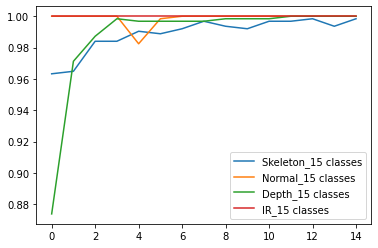

In [4]:
res50_skeleton_acc_15 = './训练记录/ResNet50/15代_15类_准确率_骨骼.mat'
res50_skeleton_loss_15 = './训练记录/ResNet50/15代_15类_误差_骨骼.mat'
res50_skeleton_acc_15_dat = scio.loadmat(res50_skeleton_acc_15)
res50_skeleton_loss_15_dat = scio.loadmat(res50_skeleton_loss_15)

res50_normal_acc_15 = './训练记录/ResNet50/15代_15类_准确率_彩图.mat'
res50_normal_loss_15 = './训练记录/ResNet50/15代_15类_误差_彩图.mat'
res50_normal_acc_15_dat = scio.loadmat(res50_normal_acc_15)
res50_normal_loss_15_dat = scio.loadmat(res50_normal_loss_15)

res50_depth_acc_15 = './训练记录/ResNet50/15代_15类_准确率_深度.mat'
res50_depth_loss_15 = './训练记录/ResNet50/15代_15类_误差_深度.mat'
res50_depth_acc_15_dat = scio.loadmat(res50_depth_acc_15)
res50_depth_loss_15_dat = scio.loadmat(res50_depth_loss_15)

res50_ir_acc_15 = './训练记录/ResNet50/15代_15类_准确率_红外.mat'
res50_ir_loss_15 = './训练记录/ResNet50/15代_15类_误差_红外.mat'
res50_ir_acc_15_dat = scio.loadmat(res50_ir_acc_15)
res50_ir_loss_15_dat = scio.loadmat(res50_ir_loss_15)

epoch = res50_skeleton_acc_15_dat['epoch'].tolist()
res50_val_acc_skeleton_15 = res50_skeleton_acc_15_dat['val_acc'].tolist()
res50_val_acc_normal_15 = res50_normal_acc_15_dat['val_acc'].tolist()
res50_val_acc_depth_15 = res50_depth_acc_15_dat['val_acc'].tolist()
res50_val_acc_ir_15 = res50_ir_acc_15_dat['val_acc'].tolist()


plt.plot(epoch[0],res50_val_acc_skeleton_15[0],label='Skeleton_15 classes')
plt.plot(epoch[0],res50_val_acc_normal_15[0],label='Normal_15 classes')
plt.plot(epoch[0],res50_val_acc_depth_15[0],label='Depth_15 classes')
plt.plot(epoch[0],res50_val_acc_ir_15[0],label='IR_15 classes')

plt.legend() 
plt.savefig("./训练记录/4种样本分类准确率对比")

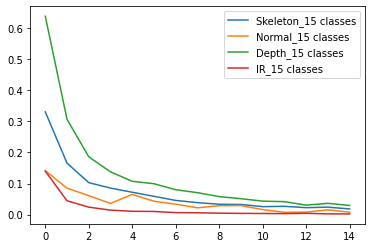

In [5]:
res50_val_loss_skeleton_15 = res50_skeleton_loss_15_dat['val_loss'].tolist()
res50_val_loss_normal_15 = res50_normal_loss_15_dat['val_loss'].tolist()
res50_val_loss_depth_15 = res50_depth_loss_15_dat['val_loss'].tolist()
res50_val_loss_ir_15 = res50_ir_loss_15_dat['val_loss'].tolist()


plt.plot(epoch[0],res50_val_loss_skeleton_15[0],label='Skeleton_15 classes')
plt.plot(epoch[0],res50_val_loss_normal_15[0],label='Normal_15 classes')
plt.plot(epoch[0],res50_val_loss_depth_15[0],label='Depth_15 classes')
plt.plot(epoch[0],res50_val_loss_ir_15[0],label='IR_15 classes')

plt.legend() 
plt.savefig("./训练记录/4种样本分类误差对比")